In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from ccn import Constraint, ConstraintsGroup
from shapes import HalfPlane, Circle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### Define the shapes

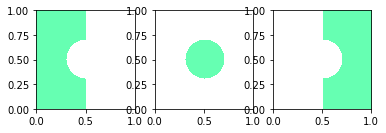

In [2]:
h1 = HalfPlane(1, 0, -0.5)
h2 = -h1 
circle = Circle(0.5, 0.5, 0.20)
shapes = [h1 & -circle, circle, h2 & -circle]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints = [
  ConstraintsGroup([Constraint('n0 :- 1')]),
  ConstraintsGroup([Constraint('n2 :- 1'), Constraint('2 :- n0 n1')])
]

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 4),
            nn.Tanh(),
            nn.Linear(4, 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): Tanh()
    (4): Linear(in_features=4, out_features=3, bias=True)
    (5): Sigmoid()
  )
)


### Train and test the model

Epoch 1
-------------------------------
loss: 0.868697 [    0/10000]
loss: 0.362930 [ 6400/10000]
Test Error: 
 Accuracy: 92.4%, 88.5%, 90.5%
 Avg loss: 0.004612 

Epoch 2
-------------------------------
loss: 0.333773 [    0/10000]
loss: 0.246811 [ 6400/10000]
Test Error: 
 Accuracy: 93.1%, 88.5%, 92.2%
 Avg loss: 0.003719 

Epoch 3
-------------------------------
loss: 0.262835 [    0/10000]
loss: 0.209012 [ 6400/10000]
Test Error: 
 Accuracy: 92.9%, 88.5%, 91.6%
 Avg loss: 0.003384 

Epoch 4
-------------------------------
loss: 0.249541 [    0/10000]
loss: 0.197817 [ 6400/10000]
Test Error: 
 Accuracy: 93.0%, 88.5%, 91.7%
 Avg loss: 0.003277 

Epoch 5
-------------------------------
loss: 0.243457 [    0/10000]
loss: 0.189708 [ 6400/10000]
Test Error: 
 Accuracy: 92.5%, 88.5%, 92.2%
 Avg loss: 0.003173 

Epoch 6
-------------------------------
loss: 0.230655 [    0/10000]
loss: 0.177581 [ 6400/10000]
Test Error: 
 Accuracy: 92.6%, 88.5%, 92.5%
 Avg loss: 0.003031 

Epoch 7
--------

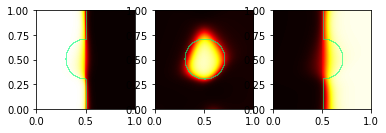

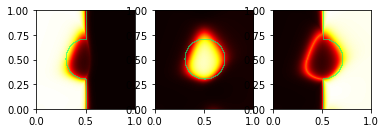

In [4]:
experiment = Experiment('midcircle', model, shapes, constraints)
experiment.run(500)
experiment.save(dir='./models/')